# Daily Challenge : Comprehensive Mobile Price Analysis

## Data Loading And Exploration:
Utilize Pandas to load the dataset and explore its initial structure.
Summarize features, target variable, and their respective data types.
Conduct basic descriptive statistics for an overview of the dataset.

In [30]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import kruskal
from scipy.stats import pearsonr, pointbiserialr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.dates as mpl_dates
import warnings; warnings.filterwarnings(action = 'ignore')

In [3]:
df = pd.read_csv('train.csv')

pd.set_option('display.max_columns', None)
# getting general information about the dataset
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [4]:
# checking for duplicate strings
df.duplicated().sum()

0

In [5]:
# descriptive statistics
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<div style="border:solid green 2px; padding: 20px">
    This dataset is mobile price classification dataset.
    
    It contains 21 columns and 2000 rows. All columns has an integer or float type. However, among them there are columns that are categorical, where a value of 1 means true and 0 means false. These columns must be converted to boolean type.
    
    There are a lot of outliers in all columns, median and mean are very different, minimum and maximum values are very far from each other.
    
    There are no duplicates and missing values in the dataset.
    
   **This dataset contains the following data:**
- battery_power - Total energy a battery can store in one time measured in mAh,
- blue - Has bluetooth or not,
- clock_speed - speed at which microprocessor executes instructions,
- dual_sim - Has dual sim support or not,
- fc - Front Camera mega pixels,
- four_g - Has 4G or not,
- int_memory - Internal Memory in Gigabytes,
- m_dep	- Mobile Depth in cm,
- mobile_wt	- Weight of mobile phone,
- n_cores - Number of cores of processor,
- pc - Primary Camera mega pixels,
- px_height - Pixel Resolution Height,
- px_width - Pixel Resolution width,
- ram - Random Access Memory in Mega Bytes,
- sc_h - Screen Height of mobile in cm,
- sc_w - Screen Width of mobile in cm,
- talk_time - longest time that a single battery charge will last when you are,
- three_g - Has 3G or not,
- touch_screen - Has touch screen or not,
- wifi - Has wifi or not,
- price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

##  Data Cleaning And Preprocessing

In [6]:
# converting categorical columns to Boolean type
df[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']] = df[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype(bool)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,False,2.2,False,1,False,7,0.6,188,2,2,20,756,2549,9,7,19,False,False,True,1
1,1021,True,0.5,True,0,True,53,0.7,136,3,6,905,1988,2631,17,3,7,True,True,False,2
2,563,True,0.5,True,2,True,41,0.9,145,5,6,1263,1716,2603,11,2,9,True,True,False,2
3,615,True,2.5,False,0,False,10,0.8,131,6,9,1216,1786,2769,16,8,11,True,False,False,2
4,1821,True,1.2,False,13,True,44,0.6,141,2,14,1208,1212,1411,8,2,15,True,True,False,1


In [25]:
print(df['blue'].value_counts())
print('-----')
print(df['dual_sim'].value_counts())
print('-----')
print(df['four_g'].value_counts())
print('-----')
print(df['three_g'].value_counts())
print('-----')
print(df['touch_screen'].value_counts())
print('-----')
print(df['wifi'].value_counts())

False    1010
True      990
Name: blue, dtype: int64
-----
True     1019
False     981
Name: dual_sim, dtype: int64
-----
True     1043
False     957
Name: four_g, dtype: int64
-----
True     1523
False     477
Name: three_g, dtype: int64
-----
True     1006
False     994
Name: touch_screen, dtype: int64
-----
True     1014
False     986
Name: wifi, dtype: int64


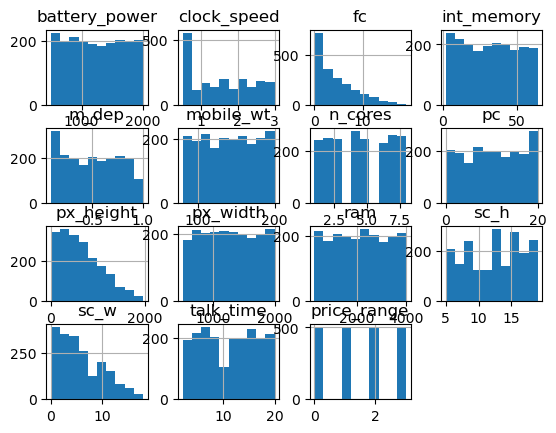

In [12]:
df.hist();

<div style="border:solid green 2px; padding: 20px">
    
- The values in the columns battery_power, int_memory, mobile_wt, pc, px_width, ram, talk_time are fairly evenly distributed, the rest are not.
- In most Boolean-type columns, the split is pretty much even, except for the three_g column - most phones have it.    

## Statistical Analysis With NumPy And SciPy:
Execute detailed statistical analysis on each feature, including:
Calculation of central tendency measures (mean, median, mode).
Analysis of variability (range, variance, standard deviation).
Evaluation of distribution shapes through skewness and kurtosis.
Perform hypothesis testing for statistical significance between groups (e.g., different price ranges).
Investigate feature-target correlations using SciPy.
Apply advanced SciPy statistical functions for deeper insights.

In [18]:
# Function to perform detailed statistical analysis on a feature
def analyze_feature(feature_name, feature_data):
    print(f"\nAnalysis for {feature_name}:")
    
    # Central tendency measures
    mean_value = np.mean(feature_data)
    median_value = np.median(feature_data)
    mode_value = stats.mode(feature_data).mode[0]
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_value}")

    # Analysis of variability
    feature_range = np.ptp(feature_data)
    variance_value = np.var(feature_data)
    std_deviation = np.std(feature_data)
    print(f"Range: {feature_range}")
    print(f"Variance: {variance_value}")
    print(f"Standard Deviation: {std_deviation}")

    # Distribution shapes (exclude boolean columns)
    if not np.issubdtype(feature_data.dtype, np.bool_):
        skewness_value = stats.skew(feature_data)
        kurtosis_value = stats.kurtosis(feature_data)
        print(f"Skewness: {skewness_value}")
        print(f"Kurtosis: {kurtosis_value}")


# Iterate through each column in the DataFrame
for column in df.columns:
    # Exclude boolean columns from the analysis
    if not np.issubdtype(df[column].dtype, np.bool_):
        analyze_feature(column, df[column])


Analysis for battery_power:
Mean: 1238.5185
Median: 1226.0
Mode: 618
Range: 1497
Variance: 192991.81565774983
Standard Deviation: 439.3083377967573
Skewness: 0.03187454295305568
Kurtosis: -1.224084165725428

Analysis for clock_speed:
Mean: 1.5222499999999983
Median: 1.5
Mode: 0.5
Range: 2.5
Variance: 0.6655299375000027
Standard Deviation: 0.8158001823363382
Skewness: 0.17795052935349268
Kurtosis: -1.3231094949498647

Analysis for fc:
Mean: 4.3095
Median: 3.0
Mode: 0
Range: 19
Variance: 18.838709749999897
Standard Deviation: 4.340358251342843
Skewness: 1.0190463925723268
Kurtosis: 0.27338561771466496

Analysis for int_memory:
Mean: 32.0465
Median: 32.0
Mode: 27
Range: 62
Variance: 329.10233775000023
Standard Deviation: 18.141177959272664
Skewness: 0.05784590180779676
Kurtosis: -1.2160344731958939

Analysis for m_dep:
Mean: 0.5017500000000017
Median: 0.5
Mode: 0.1
Range: 0.9
Variance: 0.08314193749999955
Standard Deviation: 0.28834343672086515
Skewness: 0.08901518436117652
Kurtosis: -1.

<div style="border:solid green 2px; padding: 20px">
Most features show approximately symmetric distributions (skewness around 0) with a moderate level of kurtosis.
The 'fc' (front camera) feature has positive skewness, indicating a distribution with a longer right tail.
The 'clock_speed' feature has a slightly positively skewed distribution.
'Price Range' is categorical and shows a uniform distribution with no skewness.

In [23]:
# Extracting data for each price range
price_range_0 = df[df['price_range'] == 0]['battery_power']
price_range_1 = df[df['price_range'] == 1]['battery_power']
price_range_2 = df[df['price_range'] == 2]['battery_power']
price_range_3 = df[df['price_range'] == 3]['battery_power']

# Performing the Kruskal-Wallis test
statistic, p_value = kruskal(price_range_0, price_range_1, price_range_2, price_range_3)

# Displaying the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the p-value is below the significance level (e.g., 0.05)
if p_value < 0.05:
    print("The differences between groups in battery_power are statistically significant.")
else:
    print("There is no significant difference between groups in battery_power.")

Kruskal-Wallis Test Statistic: 90.13574968352336
P-value: 2.0483291081148915e-19
The differences between groups in battery_power are statistically significant.


In [22]:
price_range_4 = df[df['price_range'] == 0]['int_memory']
price_range_5 = df[df['price_range'] == 1]['int_memory']
price_range_6 = df[df['price_range'] == 2]['int_memory']
price_range_7 = df[df['price_range'] == 3]['int_memory']

# Performing the Kruskal-Wallis test
statistic, p_value = kruskal(price_range_4, price_range_5, price_range_6, price_range_7)

# Displaying the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the p-value is below the significance level (e.g., 0.05)
if p_value < 0.05:
    print("The differences between groups in int_memory are statistically significant.")
else:
    print("There is no significant difference between groups in int_memory.")

Kruskal-Wallis Test Statistic: 8.768458295714069
P-value: 0.032533148942589206
The differences between groups in int_memory are statistically significant.


In [24]:
price_range_8 = df[df['price_range'] == 0]['ram']
price_range_9 = df[df['price_range'] == 1]['ram']
price_range_10 = df[df['price_range'] == 2]['ram']
price_range_11 = df[df['price_range'] == 3]['ram']

# Performing the Kruskal-Wallis test
statistic, p_value = kruskal(price_range_8, price_range_9, price_range_10, price_range_11)

# Displaying the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the p-value is below the significance level (e.g., 0.05)
if p_value < 0.05:
    print("The differences between groups in ram are statistically significant.")
else:
    print("There is no significant difference between groups in ram.")

Kruskal-Wallis Test Statistic: 1681.4964744599295
P-value: 0.0
The differences between groups in ram are statistically significant.


<div style="border:solid green 2px; padding: 20px">
    
The Kruskal-Wallis test, a non-parametric alternative to the analysis of variance (ANOVA) suitable for comparing more than two groups. It doesn't assume a normal distribution and is applicable when dealing with ordinal or continuous data. The Kruskal-Wallis test compares the distributions of multiple groups and assesses whether there are significant differences among them.
   
    The results of the test show that different price categories of phones have different basic parameters: Total energy a battery can store, Internal Memory and ram.

In [27]:
# Selecting numerical features and the target variable
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
target_variable = 'price_range'  # Replace with your actual target variable

# Dictionary to store correlation results
correlation_results = {}

# Calculating Pearson correlation for numerical features
for feature in numerical_features:
    correlation, p_value = pearsonr(df[feature], df[target_variable])
    correlation_results[feature] = {'correlation': correlation, 'p_value': p_value}

# Calculating Point-Biserial correlation for binary features
binary_features = df.select_dtypes(include='bool').columns
for feature in binary_features:
    correlation, p_value = pointbiserialr(df[feature], df[target_variable])
    correlation_results[feature] = {'correlation': correlation, 'p_value': p_value}

# Displaying the correlation results
for feature, result in correlation_results.items():
    print(f"\nCorrelation for {feature} vs {target_variable}:")
    print(f"Pearson correlation: {result['correlation']}")
    print(f"P-value: {result['p_value']}")


Correlation for battery_power vs price_range:
Pearson correlation: 0.20072261211373263
P-value: 1.2648542392157087e-19

Correlation for clock_speed vs price_range:
Pearson correlation: -0.006605690881732143
P-value: 0.7678151230107574

Correlation for fc vs price_range:
Pearson correlation: 0.021998207776904494
P-value: 0.32546291239352454

Correlation for int_memory vs price_range:
Pearson correlation: 0.04443495938898787
P-value: 0.046930062434378084

Correlation for m_dep vs price_range:
Pearson correlation: 0.0008530365050864255
P-value: 0.9695879315808612

Correlation for mobile_wt vs price_range:
Pearson correlation: -0.030302171314386627
P-value: 0.17553925104821838

Correlation for n_cores vs price_range:
Pearson correlation: 0.004399274799457349
P-value: 0.8441253076532164

Correlation for pc vs price_range:
Pearson correlation: 0.033599300213539934
P-value: 0.13307358920338264

Correlation for px_height vs price_range:
Pearson correlation: 0.14885755500042308
P-value: 2.2278

<div style="border:solid green 2px; padding: 20px">
    
- There is a moderate positive correlation between battery power and price range. The correlation is statistically significant.

- There is a very weak negative correlation between clock speed and price range. The correlation is not statistically significant.

- There is a very weak positive correlation between front camera quality and price range. The correlation is not statistically significant.

- There is a weak positive correlation between internal memory and price range. The correlation is marginally statistically significant.
    
- There is almost no correlation between mobile depth and price range. The correlation is not statistically significant.

- There is a very weak negative correlation between mobile weight and price range. The correlation is not statistically significant.

- There is almost no correlation between the number of cores and price range. The correlation is not statistically significant.

- There is a weak positive correlation between primary camera quality and price range. The correlation is not statistically significant.

- There is a moderate positive correlation between pixel height and price range. The correlation is statistically significant.
    
- There is a moderate positive correlation between pixel width and price range. The correlation is statistically significant.

- There is a strong positive correlation between RAM and price range. The correlation is highly statistically significant.

- There is a very weak positive correlation between screen height and price range. The correlation is not statistically significant.

- There is a weak positive correlation between screen width and price range. The correlation is marginally statistically significant.
    
- There is a very weak positive correlation between talk time and price range. The correlation is not statistically significant.

- There is a very weak positive correlation between Bluetooth availability and price range. The correlation is not statistically significant.

- There is a very weak positive correlation between dual SIM functionality and price range. The correlation is not statistically significant.
    
- There is a very weak positive correlation between 4G availability and price range. The correlation is not statistically significant.

- There is a very weak positive correlation between 3G availability and price range. The correlation is not statistically significant.

- There is a very weak negative correlation between touch screen availability and price range. The correlation is not statistically significant.

- There is a very weak positive correlation between Wi-Fi availability and price range. The correlation is not statistically significant.
 
- Thus, features like RAM, pixel height, and pixel width show strong positive correlations with the price range and are highly statistically significant.
Other features have weak or very weak correlations with the price range, and some are not statistically significant.

In [29]:
# Selecting features for the regression
features = ['battery_power', 'ram', 'px_height', 'px_width', 'sc_h', 'sc_w']

# Splitting the data into training and testing sets
X = df[features]
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = linear_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMultiple linear regression results:")
print(f"Mean squared error: {mse}")


Multiple Linear Regression Results:
Mean Squared Error: 0.10529526558997424


In [31]:
# Selecting features for logistic regression
logistic_features = ['battery_power', 'ram', 'px_height', 'px_width', 'sc_h', 'sc_w']

# Binary classification: 1 if price_range is high (2 or 3), 0 otherwise
df['high_price'] = df['price_range'].apply(lambda x: 1 if x >= 2 else 0)

# Splitting the data for logistic regression
X_logistic = df[logistic_features]
y_logistic = df['high_price']
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic, y_logistic, test_size=0.2, random_state=42
)

# Creating and fitting the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

# Predicting on the test set
y_pred_logistic = logistic_model.predict(X_test_logistic)

# Evaluating the logistic regression model
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)
print(f"\nLogistic Regression Results:")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Logistic Regression Results:
Accuracy: 0.9925
Confusion Matrix:
[[196   0]
 [  3 201]]


<div style="border:solid green 2px; padding: 20px">

- The MSE value represents the average squared difference between the predicted 'price_range' values and the actual 'price_range' values in this dataset.
A lower MSE indicates better model performance, with smaller errors in predictions.
In this case, an MSE of 0.1053 suggests that, on average, the squared difference between the predicted and actual 'price_range' values is relatively small. 
- The accuracy of 99.25% indicates the proportion of correctly predicted instances out of the total instances in the test set. A high accuracy suggests that the model is performing very well on the test data. The confusion matrix shows that there are very few misclassifications: 3 instances of false negatives (predicting non-high price when it was actually high) and no instances of false positives (predicting high price when it was actually non-high). The absence of false positives (FP = 0) suggests that the model is conservative in predicting high price ranges and avoids mistakenly classifying non-high price ranges as high. The presence of false negatives (FN = 3) indicates instances where the model missed predicting high price ranges when they were actually high.

## Data Visualization With Matplotlib:
Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
Employ heatmaps for correlation visualization.
Ensure clarity in plots with appropriate titles, labels, and axis information.

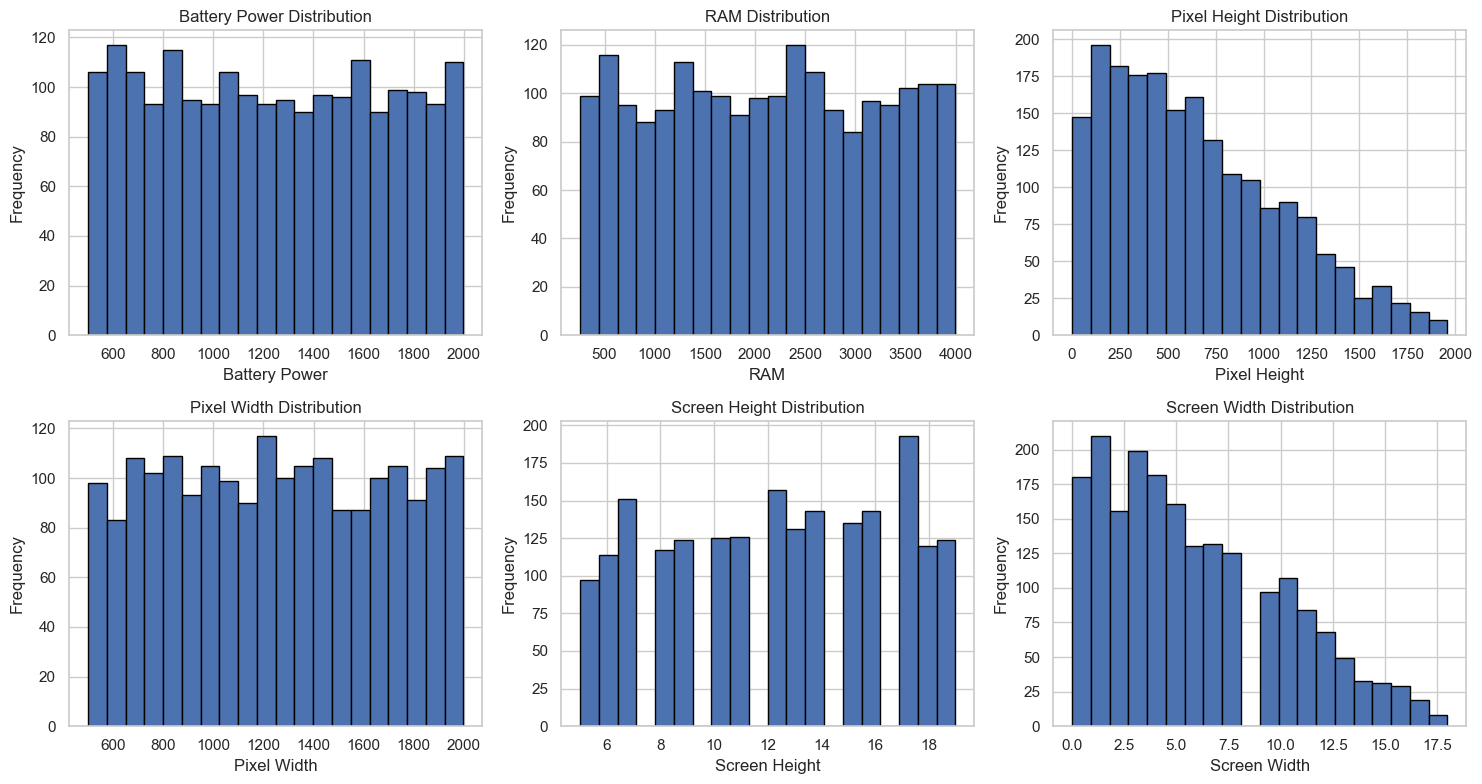

In [32]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

df['battery_power'].plot(kind='hist', ax=axes[0, 0], bins=20, edgecolor='black')
axes[0, 0].set_title('Battery power distribution')
axes[0, 0].set_xlabel('Battery power')
axes[0, 0].set_ylabel('Frequency')

df['ram'].plot(kind='hist', ax=axes[0, 1], bins=20, edgecolor='black')
axes[0, 1].set_title('RAM distribution')
axes[0, 1].set_xlabel('RAM')
axes[0, 1].set_ylabel('Frequency')

df['px_height'].plot(kind='hist', ax=axes[0, 2], bins=20, edgecolor='black')
axes[0, 2].set_title('Pixel height distribution')
axes[0, 2].set_xlabel('Pixel height')
axes[0, 2].set_ylabel('Frequency')

df['px_width'].plot(kind='hist', ax=axes[1, 0], bins=20, edgecolor='black')
axes[1, 0].set_title('Pixel width distribution')
axes[1, 0].set_xlabel('Pixel width')
axes[1, 0].set_ylabel('Frequency')

df['sc_h'].plot(kind='hist', ax=axes[1, 1], bins=20, edgecolor='black')
axes[1, 1].set_title('Screen height distribution')
axes[1, 1].set_xlabel('Screen height')
axes[1, 1].set_ylabel('Frequency')

df['sc_w'].plot(kind='hist', ax=axes[1, 2], bins=20, edgecolor='black')
axes[1, 2].set_title('Screen width distribution')
axes[1, 2].set_xlabel('Screen Wwidth')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

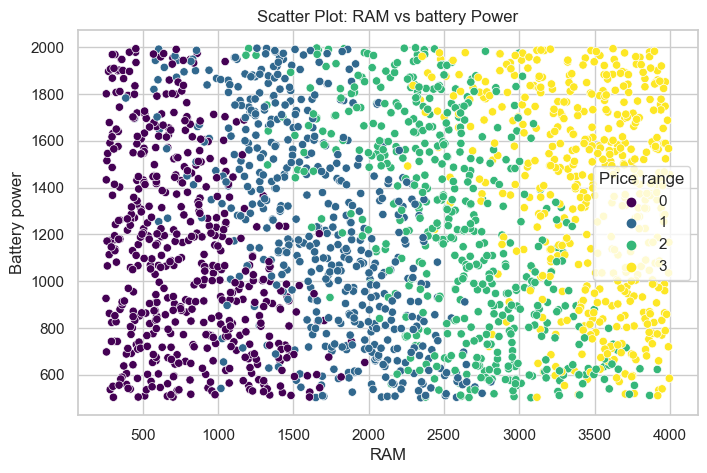

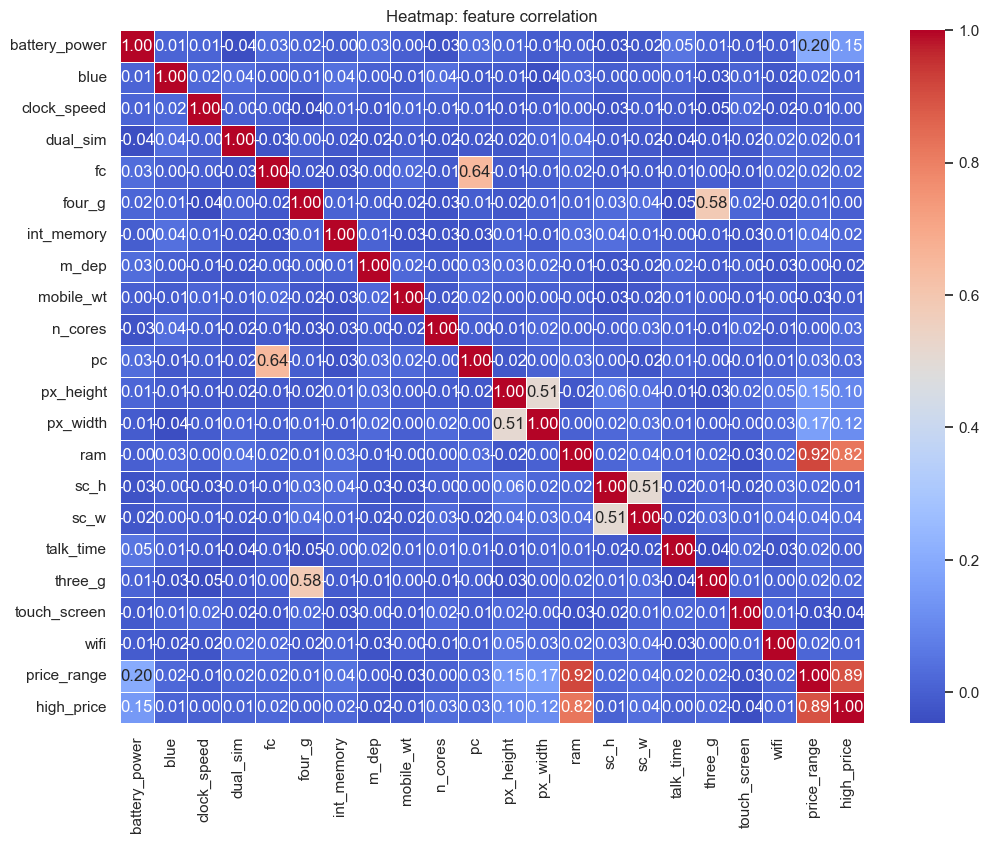

In [35]:
# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ram', y='battery_power', data=df, hue='price_range', palette='viridis')
plt.title('Scatter Plot: RAM vs battery Power')
plt.xlabel('RAM')
plt.ylabel('Battery power')
plt.legend(title='Price range')
plt.show()

# Heatmap for Correlation Visualization
correlation_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap: feature correlation')
plt.show()

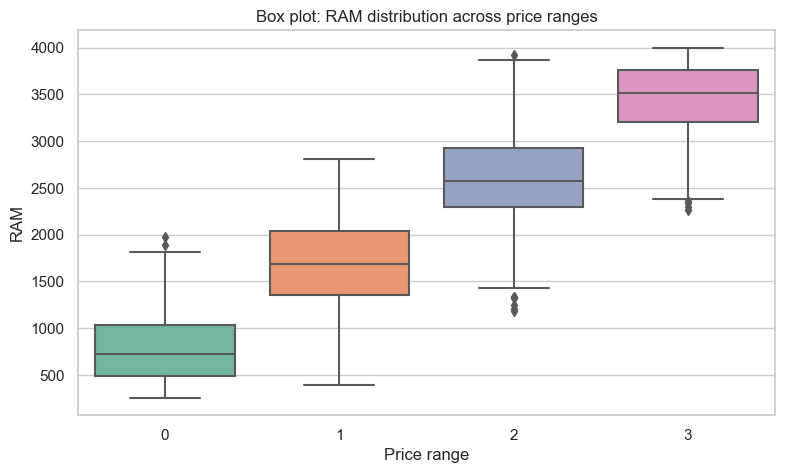

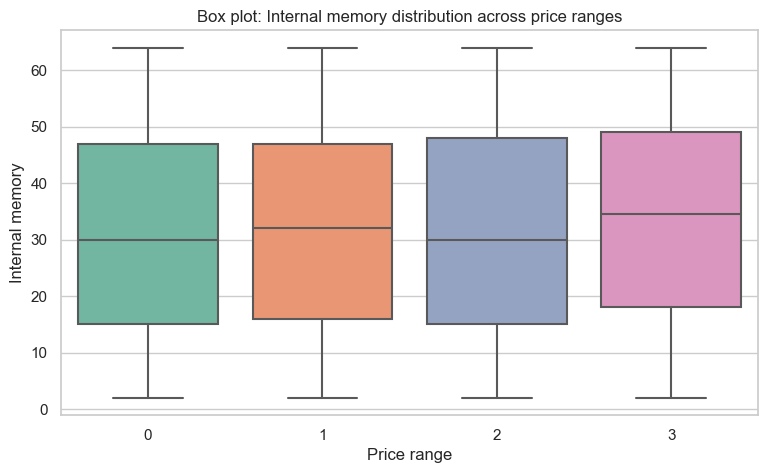

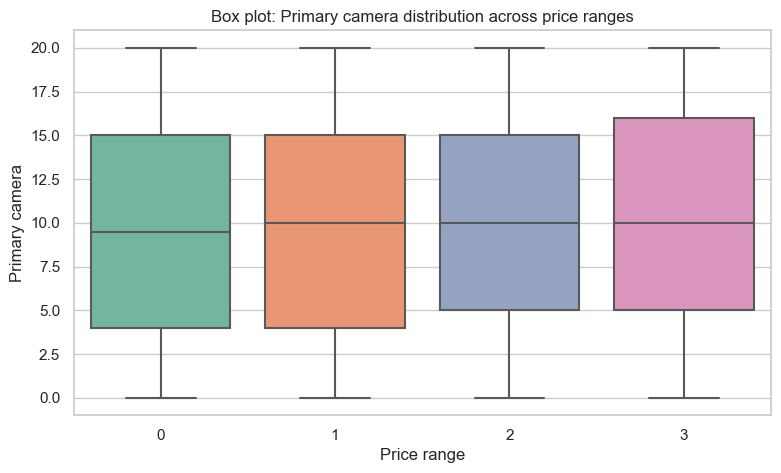

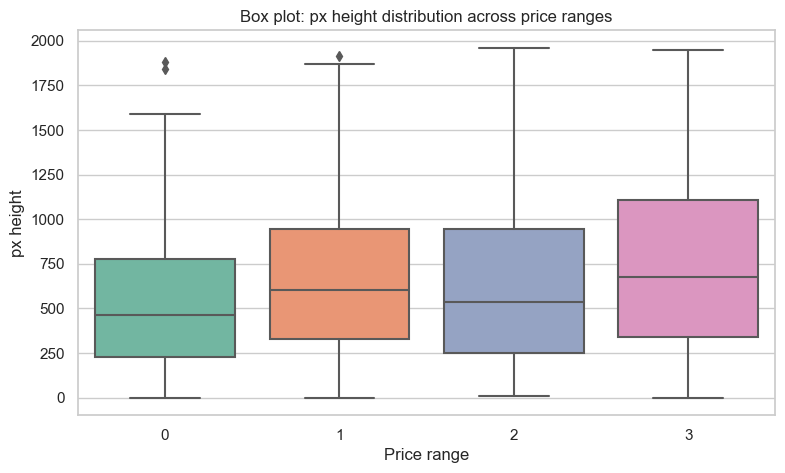

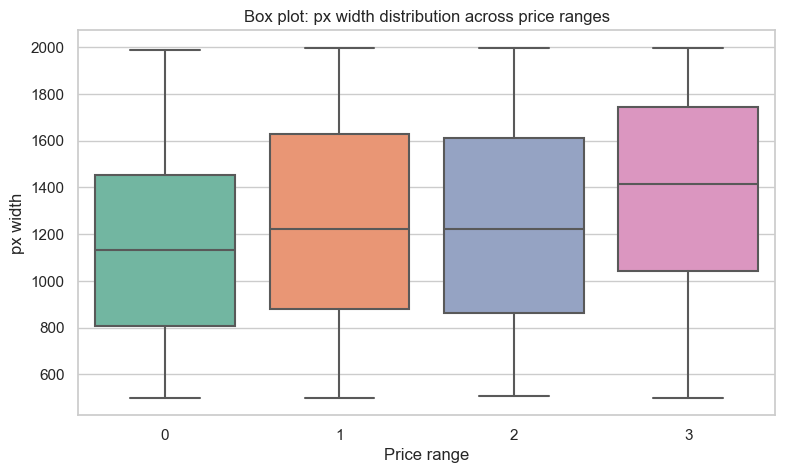

In [37]:
# Box plots
plt.figure(figsize=(9, 5))
sns.boxplot(x='price_range', y='ram', data=df, palette='Set2')
plt.title('Box plot: RAM distribution across price ranges')
plt.xlabel('Price range')
plt.ylabel('RAM')
plt.show()

plt.figure(figsize=(9, 5))
sns.boxplot(x='price_range', y='int_memory', data=df, palette='Set2')
plt.title('Box plot: Internal memory distribution across price ranges')
plt.xlabel('Price range')
plt.ylabel('Internal memory')
plt.show()

plt.figure(figsize=(9, 5))
sns.boxplot(x='price_range', y='pc', data=df, palette='Set2')
plt.title('Box plot: Primary camera distribution across price ranges')
plt.xlabel('Price range')
plt.ylabel('Primary camera')
plt.show()

plt.figure(figsize=(9, 5))
sns.boxplot(x='price_range', y='px_height', data=df, palette='Set2')
plt.title('Box plot: px height distribution across price ranges')
plt.xlabel('Price range')
plt.ylabel('px height')
plt.show()

plt.figure(figsize=(9, 5))
sns.boxplot(x='price_range', y='px_width', data=df, palette='Set2')
plt.title('Box plot: px width distribution across price ranges')
plt.xlabel('Price range')
plt.ylabel('px width')
plt.show()

<div style="border:solid green 2px; padding: 20px">
    
- Battery power values between 500 and 2000 are found on phones with different RAM and in all price ranges. The higher the price category, the higher the RAM is.
- The correlation matrix revealed a strong correlation (0.92) between RAM and price range, between and price range 0.89, correlation 0.64 between Front Camera and Primary Camera, between three g and four g - 0.58.
- Boxplots show that the values of internal memory and primary camera are about the same in all price categories, only slightly higher in the most expensive category. RAM values, on the other hand, increase in each successive price category. The width and height of pixels also increase slightly with increasing price range.

## Insight Synthesis And Conclusion:
Derive conclusions from statistical tests and visualizations.
Identify key determinants in mobile price classification.
Highlight any unexpected or significant findings.

<div style="border:solid green 2px; padding: 20px">

- RAM is a strong predictor:
The correlation analysis and multiple linear regression results highlight that RAM is a significant determinant in predicting mobile price. There is a strong positive correlation between RAM and price range, and the multiple linear regression model suggests that as RAM increases, the price range tends to increase.

- Pixel dimensions influence price:
Data analysis demonstrate that pixel dimensions (px_height and px_width) have an impact on mobile price. Devices with higher pixel resolutions tend to have higher price ranges.

- Battery power and screen dimensions no matter:
Battery power and screen dimensions (sc_h and sc_w) almost no contribute to mobile pricing. 

- The logistic regression model achieved an exceptionally high accuracy of 99.25%. While this indicates strong predictive performance, it's essential to assess the potential influence of the dataset size, imbalance, or outliers on the results.
No Significant Impact of Additional Features:

- Features such as 'blue,' 'dual_sim,' 'four_g,' 'three_g,' 'touch_screen,' and 'wifi' do not show strong correlations with the price range. These features may not be significant determinants in mobile price classification based on the analysis conducted.

- The heatmap provides a visual representation of feature correlations.
    
- The unexpected finding of a highly accurate logistic regression model raises questions about the potential presence of outliers or data peculiarities. Further investigation and validation may be necessary to ensure the robustness of the model.